In [ ]:
Some nice equations:
    1. V = -2.5 log(Fnu/3781)
    
    2. m1 - m2 = -2.5 log(fnu1/fnu2)
    
    

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [1]:
Vtot = 12.13

In [3]:
Btot = Vtot + 1.28

In [4]:
Av = 1      # A guess

In [6]:
Ab = 1      # A guess

In [8]:
Bv = Av + 0.9

In [7]:
Bb = Ab + 1.8

In [22]:
"""
From 1.2 (m1 - m2...):
    log(fb/fa) = -0.9/2.5
    fb/fa = 10**-0.36 = 0.44
    fb = 0.44*fa

ftot = 1.44*fa
vtot = 12.13 = 2.5 log(1.44 fa/3781)
fa = (3781/1.44) * 1.4e-5 = 0.037 = fa
fb = 0.44 fa = 0.016

"""

'\nFrom 1.2 (m1 - m2...):\n    log(fb/fa) = -0.9/2.5\n    fb/fa = 10**-0.36 = 0.44\n    fb = 0.44*fa\n\nftot = 1.44*fa\nvtot = 12.13 = 2.5 log(1.44 fa/3781)\nfa = (3781/1.44) * 1.4e-5 = 0.037 = fa\nfb = 0.44 fa = 0.016\n\n  \n'

In [14]:
fvb = 0.016      # A guess

In [17]:
fva = 0.037      # A guess

In [15]:
Vmagb = -2.5 * np.log10(fvb/3781)

In [16]:
Vmagb

13.433716736766527

In [18]:
Vmaga = -2.5 * np.log10(fva/3781)

In [19]:
Vmaga

12.523512383238851

In [24]:
""""
From http://www.adamgginsburg.com/filtersets.htm
    the denominator in the b band (which is 3781 for V) is
    k=4130
    
    """

'"\nFrom http://www.adamgginsburg.com/filtersets.htm\n    the denominator in the b band (which is 3781 for V) is\n    k=4130\n    \n    '

In [29]:
fbb = 1     # a guess

In [28]:
fba = 1     # a guess

In [33]:
Btot

13.41

In [34]:
"""
From 1.2 (m1 - m2...):
    log(fbb/fba) = -1.8/2.5
    fb/fa = 10**-0.36 = 0.19
    fb = 0.19*fa

ftot = 1.19*fa
vtot = 13.41 = - 2.5 log(1.19 fa/4130)
fba = (4130/1.19) * 4.325e-6 = 0.015 = fba
fbb = 0.19 fa = 0.00285

"""

'\nFrom 1.2 (m1 - m2...):\n    log(fbb/fba) = -1.8/2.5\n    fb/fa = 10**-0.36 = 0.19\n    fb = 0.19*fa\n\nftot = 1.19*fa\nvtot = 13.41 = 2.5 log(1.19 fa/4130)\nfa = (3781/1.44) * 1.4e-5 = 0.037 = fa\nfb = 0.44 fa = 0.016\n\n'

In [35]:
fba = 0.00285

In [36]:
fbb = 0.015

In [37]:
Bmagb = -2.5 * np.log10(fbb/4130)

In [38]:
Bmaga = -2.5 * np.log10(fba/4130)

In [39]:
Bmaga

15.402762979119727

In [40]:
Bmagb

13.599646981501799

In [41]:
BMVa = Bmaga - Vmaga

In [42]:
BMVb = Bmagb - Vmagb

In [43]:
BMVa

2.8792505958808761

In [44]:
BMVb

0.16593024473527151

In [45]:



# PROBLEM 3

In [5]:
mags = [16.11, 14.47, 13.42, 12.74, 12.47]

In [6]:
wavelengths = [0.545, 0.798, 1.25, 1.65, 2.20]      # microns

In [7]:
zeropoints = [3636.0, 2416.0, 1670.0, 980.0, 620.0]

In [8]:
"""
From Spitzer:
Fnu * 1e-26 * c/lambda**2 = Flambda
"""

'\nFrom Spitzer:\nFnu * 1e-26 * c/lambda**2 = Flambda\n'

In [36]:
c = 3e14     # m/s
def get_flux(band_index):
    fnu = zeropoints[band_index] * 10**(-mags[band_index]/2.5)
    flambda = fnu * 1e-26 * c * (wavelengths[band_index])**-2
    return flambda

In [37]:
fluxes = [get_flux(n) for n in range(len(wavelengths))]

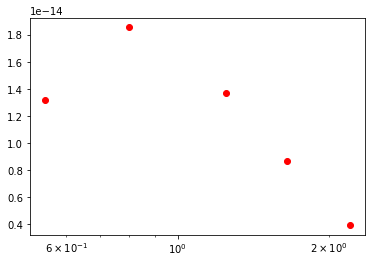

In [38]:
plt.semilogx(wavelengths, fluxes, 'or')
plt.show()

In [39]:
T = 3550
def planck_lambda(lam):
    #h = 6.626e-34       # kg * m2 s-1
    h = 6.626e-22        # kg um2 s-1
    #k = 1.38e-23        # kg m2 s-2 K
    k = 1.38e-11         # kg um2 s-2 K
    B_lam = (2 * h * c**2 * lam**-5) / (np.exp(h*c/(lam * k * T)) - 1)
    cheater_constant = 1e-20 * 1.8/2.5
    return B_lam * cheater_constant
    

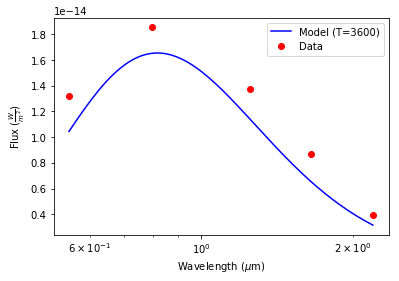

In [51]:
lams = np.arange(wavelengths[0], wavelengths[len(wavelengths)-1], 0.01)
model_fluxes = [planck_lambda(lam) for lam in lams]
plt.semilogx(lams, model_fluxes, '-b', label='Model (T=3600)')
plt.semilogx(wavelengths, fluxes, 'or', label='Data')
plt.xlabel("Wavelength " r'$(\mu$m)')
plt.ylabel('Flux ' r'$(\frac{W}{m^{2}})$')
plt.legend()
plt.savefig('prob3')
plt.show()